<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-01-16 15:23:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.1MB/s    in 2.4s    

2025-01-16 15:23:27 (64.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



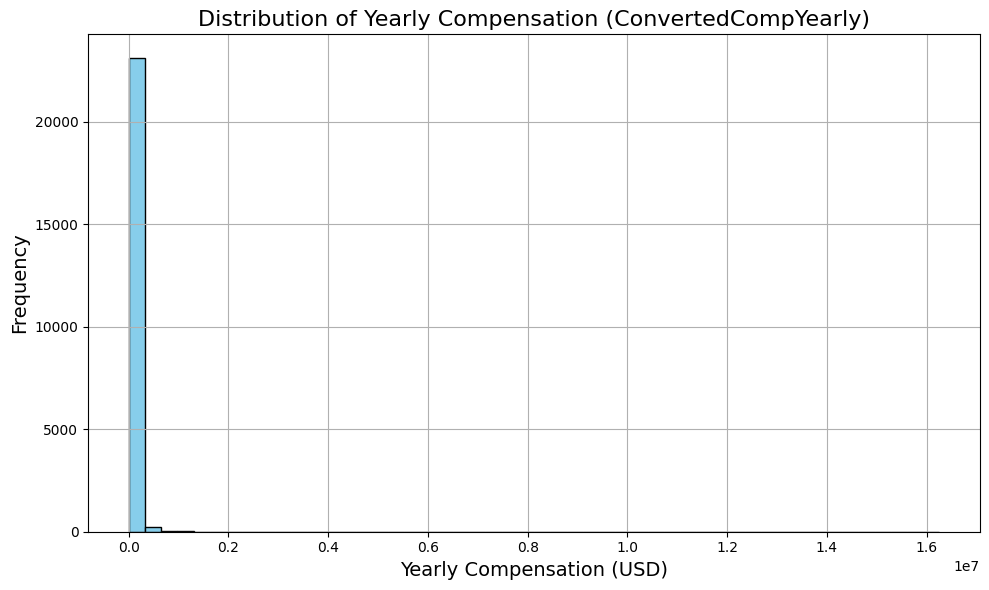

In [4]:
## Write your code here
# Step 1: Check for missing or invalid values in ConvertedCompYearly
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Step 2: Drop rows with missing or invalid compensation data
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Step 3: Create a histogram to visualize the distribution of yearly compensation
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')

# Step 4: Customize the plot
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

# Step 5: Show the plot
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



/tmp/ipykernel_1236/3029760866.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,


ValueError: Dimensions of labels and X must be compatible

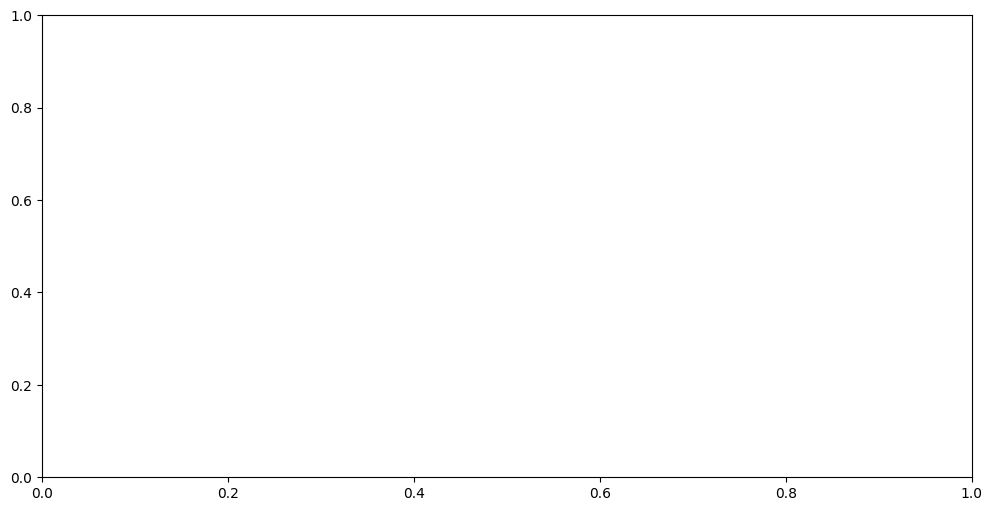

In [9]:
# Step 1: Load the data
df = pd.read_csv("survey-data.csv")

# Step 2: Clean the 'Age' column by converting to numeric and handling errors
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # 'coerce' will turn non-numeric values into NaN

# Step 3: Drop rows with missing 'Age' values (if any)
df = df.dropna(subset=['Age'])

# Step 4: Create age groups using pd.cut() to ensure consistent ranges
bins = [20, 30, 40, 50, 60, 70, 80]  # Define the bins for age groups
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']  # Age group labels

# Add a new column 'AgeGroup' by binning the 'Age' column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 5: Clean the data by removing rows with missing values in 'ConvertedCompYearly' or 'AgeGroup'
df_cleaned = df.dropna(subset=['AgeGroup', 'ConvertedCompYearly'])

# Step 6: Create the data for the box plot
age_groups_sorted = sorted(df_cleaned['AgeGroup'].unique())  # Get sorted age groups

# Create a list of compensation values for each age group
data = [df_cleaned[df_cleaned['AgeGroup'] == group]['ConvertedCompYearly'] for group in age_groups_sorted]

# Step 7: Create the box plot
plt.figure(figsize=(12, 6))

# Create the boxplot with appropriate settings
plt.boxplot(data, 
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=6),
            medianprops=dict(color='blue', linewidth=2),
            labels=age_groups_sorted)  # Correctly use 'labels' for age group names

# Step 8: Customize the plot
plt.title('Distribution of Yearly Compensation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Yearly Compensation (USD)', fontsize=14)
plt.grid(True)

# Step 9: Show the plot
plt.tight_layout()
plt.show()




### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



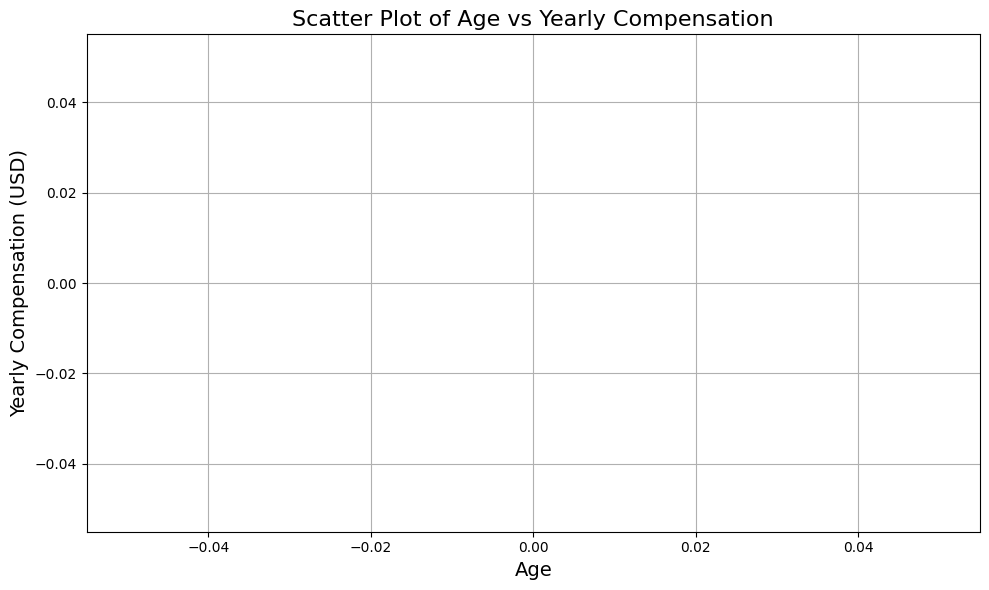

In [10]:
## Write your code here

# Step 2: Convert 'Age' to numeric, coercing any errors to NaN
df['Age_numeric'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 3: Drop rows with missing values in 'Age_numeric' or 'ConvertedCompYearly'
df_cleaned = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

# Step 4: Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of 'Age_numeric' vs 'ConvertedCompYearly'
plt.scatter(df_cleaned['Age_numeric'], df_cleaned['ConvertedCompYearly'], alpha=0.5, color='blue')

# Step 5: Customize the plot
plt.title('Scatter Plot of Age vs Yearly Compensation', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Yearly Compensation (USD)', fontsize=14)
plt.grid(True)

# Step 6: Show the plot
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


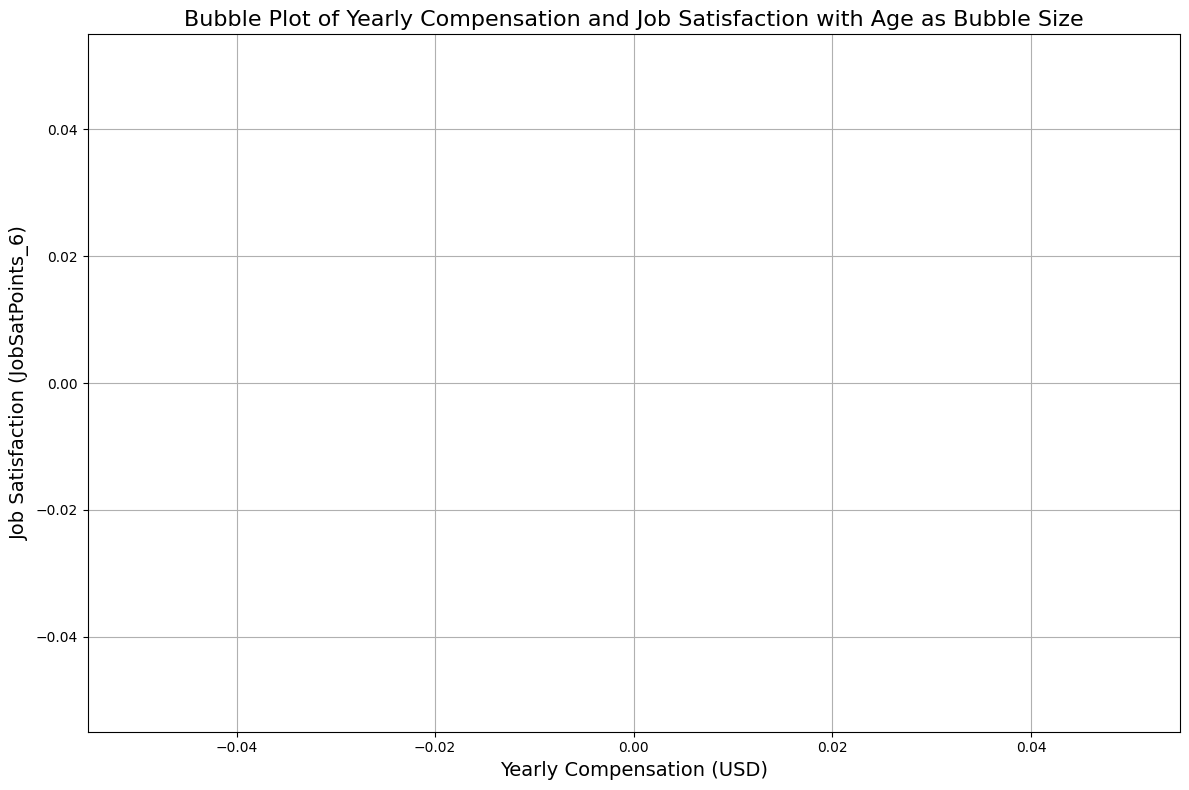

In [11]:
# Step 2: Convert 'Age' to numeric, coercing errors to NaN, if necessary
df['Age_numeric'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 3: Drop rows with missing values in 'ConvertedCompYearly', 'JobSatPoints_6', or 'Age_numeric'
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

# Step 4: Scale bubble size by normalizing 'Age_numeric' to a reasonable range
# Normalize Age_numeric for bubble size (scaled between 50 and 1000)
bubble_size = (df_cleaned['Age_numeric'] - df_cleaned['Age_numeric'].min()) / (df_cleaned['Age_numeric'].max() - df_cleaned['Age_numeric'].min()) * 950 + 50

# Step 5: Create the bubble plot
plt.figure(figsize=(12, 8))

# Scatter plot with 'ConvertedCompYearly' on X, 'JobSatPoints_6' on Y, and 'Age_numeric' as bubble size
plt.scatter(
    df_cleaned['ConvertedCompYearly'], 
    df_cleaned['JobSatPoints_6'], 
    s=bubble_size,   # Size of bubbles based on Age_numeric
    alpha=0.6,       # Transparency of the bubbles
    color='blue',    # Color of the bubbles
    edgecolors='black'  # Border color of the bubbles
)

# Step 6: Customize the plot
plt.title('Bubble Plot of Yearly Compensation and Job Satisfaction with Age as Bubble Size', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.grid(True)

# Step 7: Show the plot
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



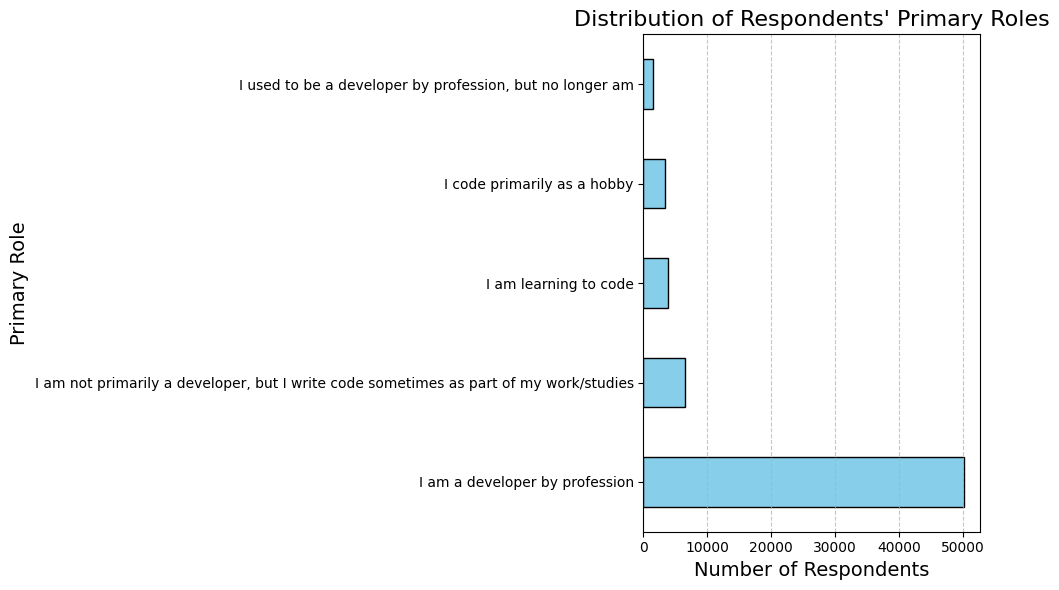

<Figure size 640x480 with 0 Axes>

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Handle missing values in 'MainBranch' (if any)
df_cleaned = df.dropna(subset=['MainBranch'])

# Step 3: Count the distribution of MainBranch (primary role) values
mainbranch_counts = df_cleaned['MainBranch'].value_counts()

# Step 4: Check if the column has valid data before plotting
if not mainbranch_counts.empty:
    # Step 5: Create a horizontal bar chart
    plt.figure(figsize=(10, 6))
    mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

    # Step 6: Customize the chart
    plt.title('Distribution of Respondents\' Primary Roles', fontsize=16)
    plt.xlabel('Number of Respondents', fontsize=14)
    plt.ylabel('Primary Role', fontsize=14)
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Step 7: Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("The 'MainBranch' column has no valid data to plot.")


# Step 5: Show the plot
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



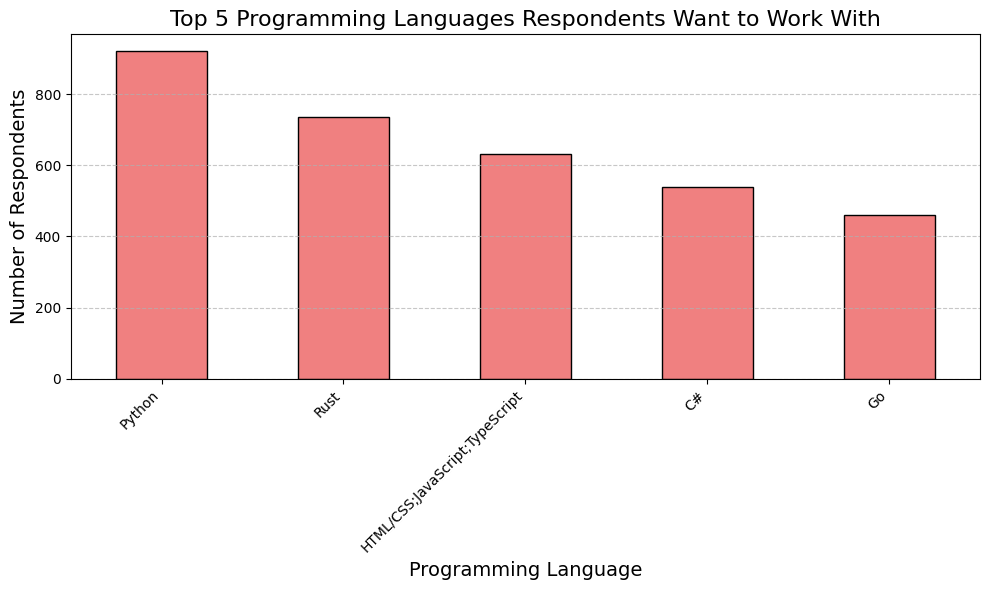

In [14]:

# Step 2: Handle missing values in 'LanguageWantToWorkWith' (if any)
df_cleaned = df.dropna(subset=['LanguageWantToWorkWith'])

# Step 3: Get the count of each programming language in 'LanguageWantToWorkWith'
language_counts = df_cleaned['LanguageWantToWorkWith'].value_counts()

# Step 4: Get the top 5 most wanted languages
top_5_languages = language_counts.head(5)

# Step 5: Create a vertical bar chart
plt.figure(figsize=(10, 6))
top_5_languages.plot(kind='bar', color='lightcoral', edgecolor='black')

# Step 6: Customize the chart
plt.title('Top 5 Programming Languages Respondents Want to Work With', fontsize=16)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Step 7: Show the plot
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_1236/169748669.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


<Figure size 1000x600 with 0 Axes>

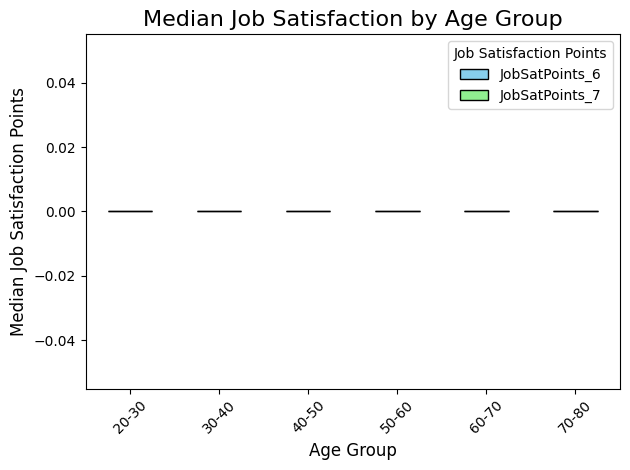

In [16]:
## Write your code here
# Step 2: Ensure 'Age' is numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 3: Remove rows with missing 'Age' or invalid entries
df = df.dropna(subset=['Age'])

# Step 4: Create Age Groups by binning the 'Age' column
bins = [20, 30, 40, 50, 60, 70, 80]  # Define the age ranges
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']  # Define labels for the age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 5: Calculate the median JobSatPoints_6 and JobSatPoints_7 by Age Group
median_values = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 6: Plot the Stacked Bar Chart
plt.figure(figsize=(10, 6))

# Plot the data as a stacked bar chart
median_values.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

# Step 7: Customize the plot
plt.title('Median Job Satisfaction by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Job Satisfaction Points', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Points', labels=['JobSatPoints_6', 'JobSatPoints_7'])

# Show the plot
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 2: Clean the 'DatabaseHaveWorkedWith' column
# Split the string values into individual databases
databases = df['DatabaseHaveWorkedWith'].dropna().str.split(',').explode().str.strip()

# Step 3: Count the frequency of each database
database_counts = databases.value_counts()

# Step 4: Plot the bar chart
plt.figure(figsize=(12, 8))
database_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')

# Step 5: Customize the plot
plt.title('Top 10 Most Popular Databases', fontsize=16)
plt.xlabel('Database', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [ ]:
## Write your code here

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
